## Task: Movie Rating Prediction With Python

## Importing Necessary Libraries

In [199]:
import warnings as warn
warn.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading and Cleaning Dataset

In [140]:
!unzip "/content/archive (2).zip"

Archive:  /content/archive (2).zip
replace IMDb Movies India.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [200]:
df = pd.read_csv('/content/IMDb Movies India.csv',encoding='ISO-8859-1')

In [201]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [202]:
df.shape

(15509, 10)

In [203]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [204]:
df.dropna(inplace=True)

In [205]:
df.shape

(5659, 10)

In [206]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [207]:
df.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [209]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

In [210]:
df.describe()

,Rating,Votes
count,5659.000000,5659.000000
mean,5.898533,2697.649585
std,1.381165,13651.503584
min,1.100000,5.000000
25%,5.000000,30.000000
50%,6.100000,131.000000
75%,6.900000,922.500000
max,10.000000,591417.000000


In [211]:
df['Duration'] = df['Duration'].str.replace('min', '').astype(int)

In [212]:
df.describe()

,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000
mean,133.439124,5.898533,2697.649585
std,25.319939,1.381165,13651.503584
min,21.000000,1.100000,5.000000
25%,119.000000,5.000000,30.000000
50%,135.000000,6.100000,131.000000
75%,150.000000,6.900000,922.500000
max,321.000000,10.000000,591417.000000


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 486.3+ KB


## Exploratory Data Analysis


In [214]:
df['Genre'] = df['Genre'].astype(str)
df['Genre_Count'] = df['Genre'].apply(lambda x: len(x.split(',')))

<Axes: >

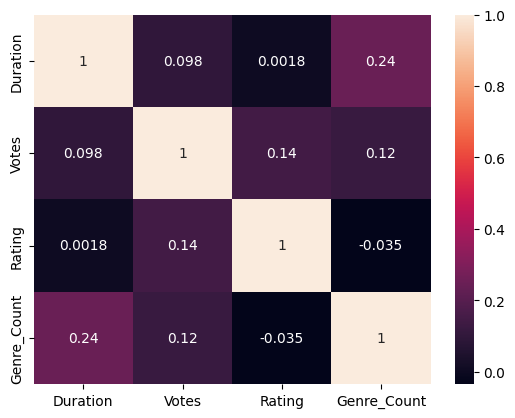

In [215]:
sns.heatmap(df[['Duration','Votes','Rating','Genre_Count']].corr(),annot=True)

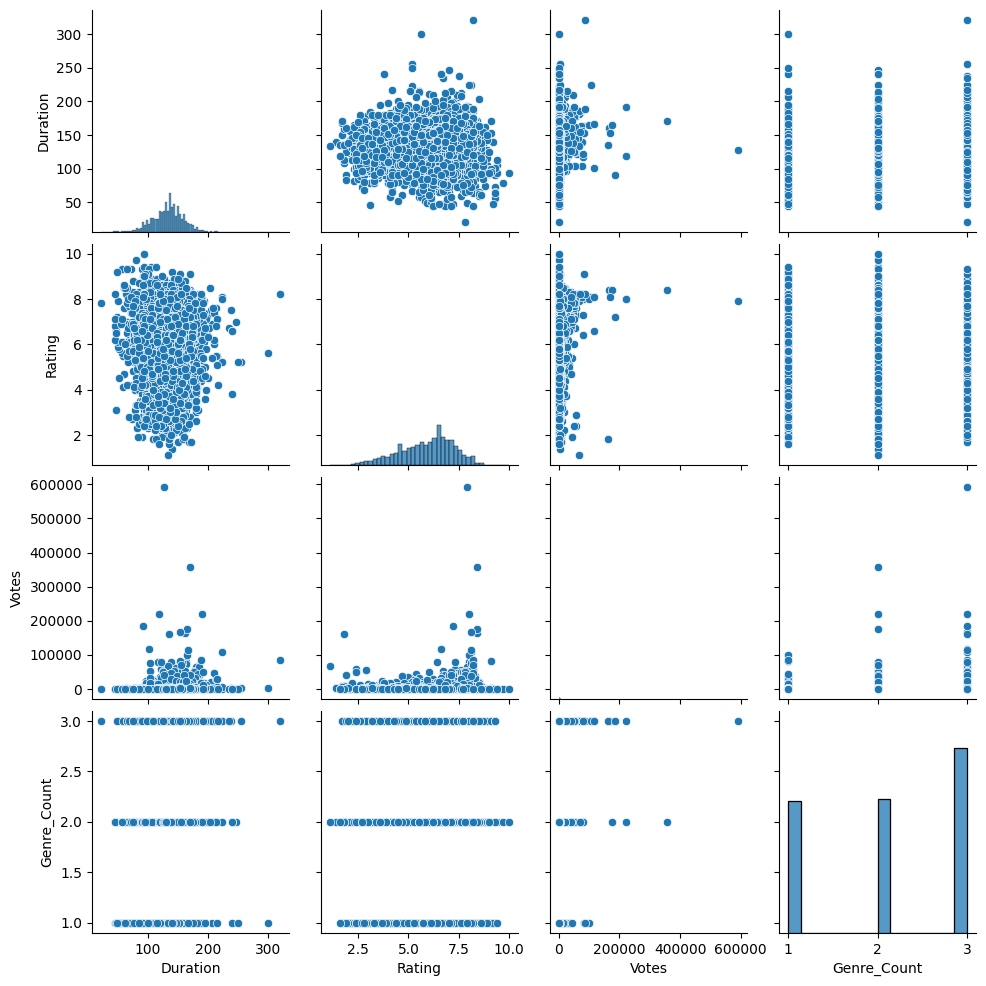

In [216]:
sns.pairplot(df)
plt.show()

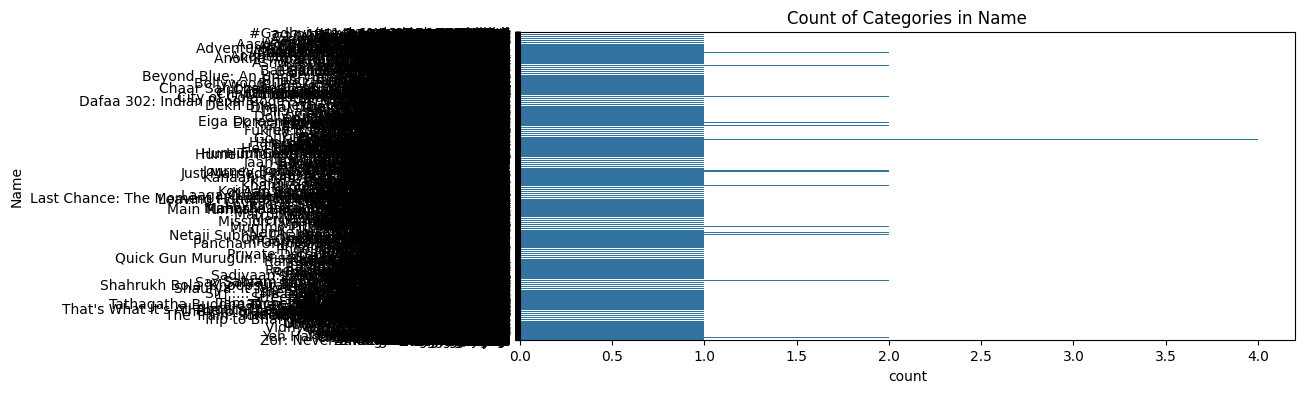

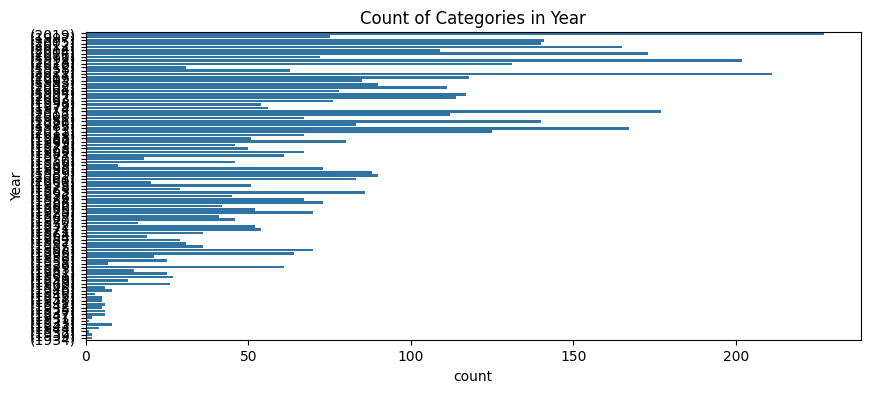

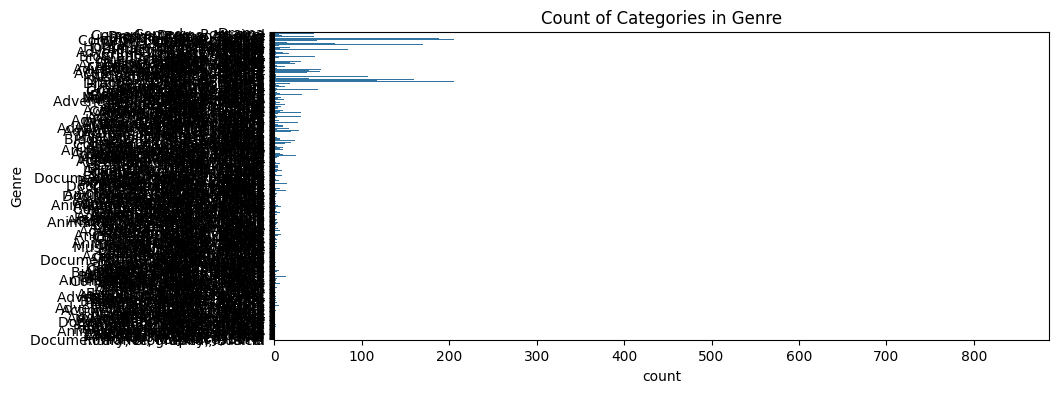

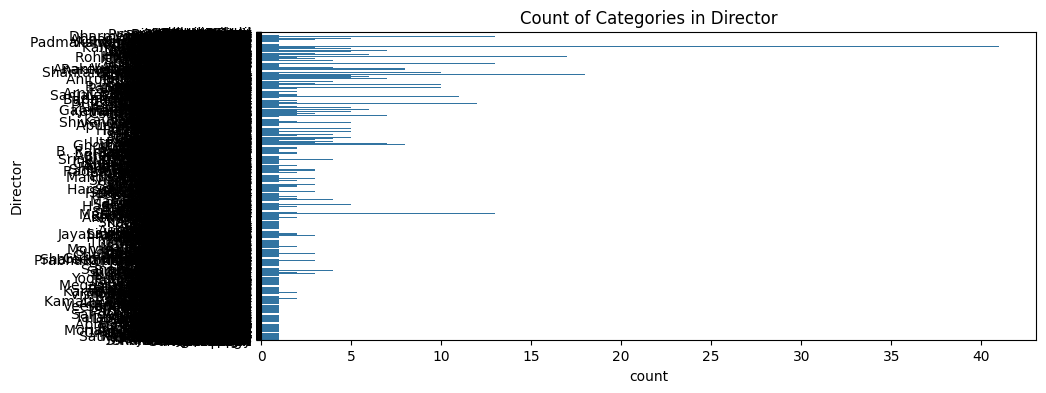

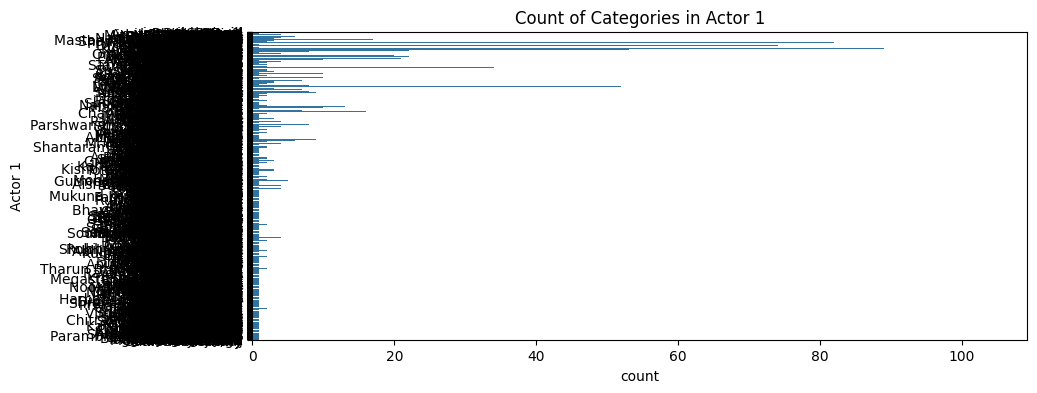

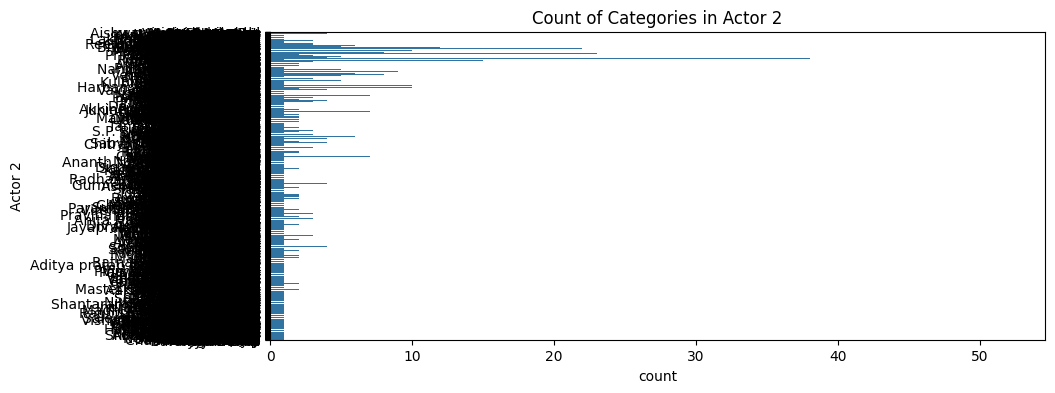

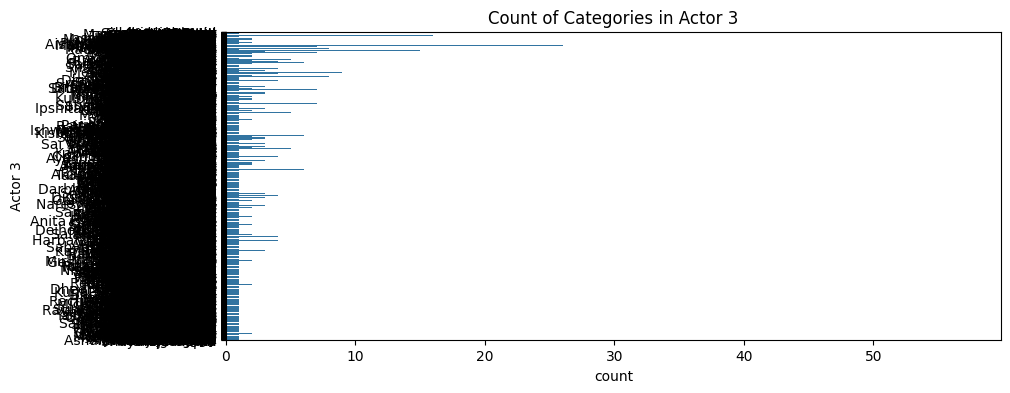

In [217]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col])
    plt.title(f'Count of Categories in {col}')
    plt.show()

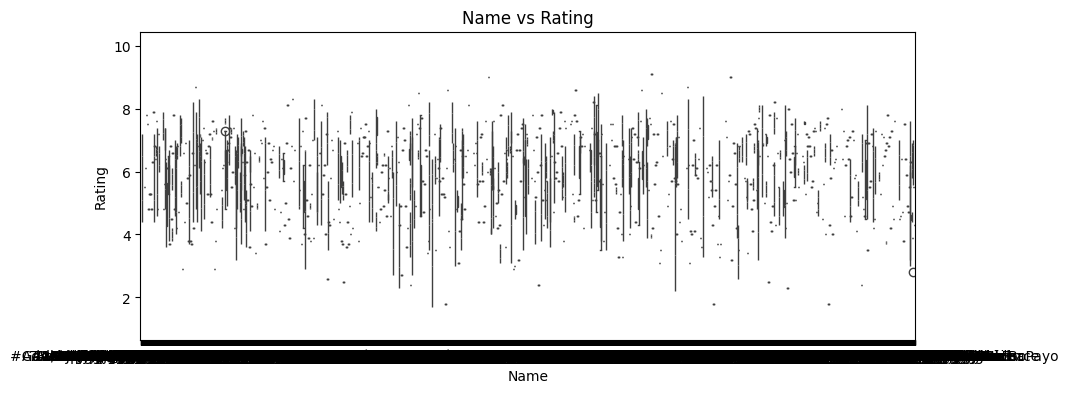

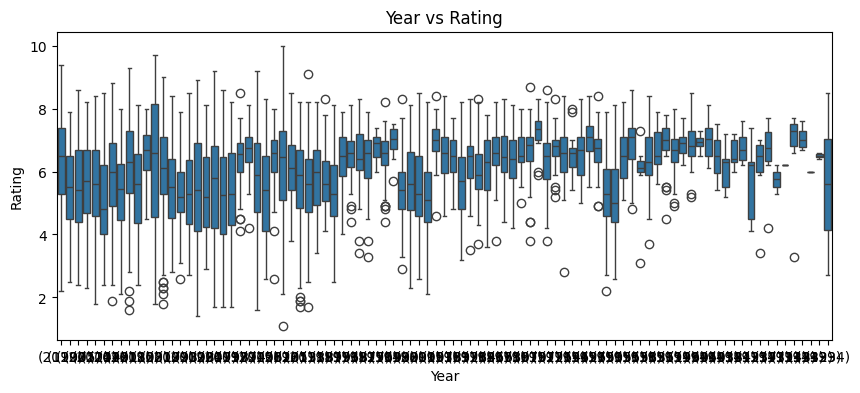

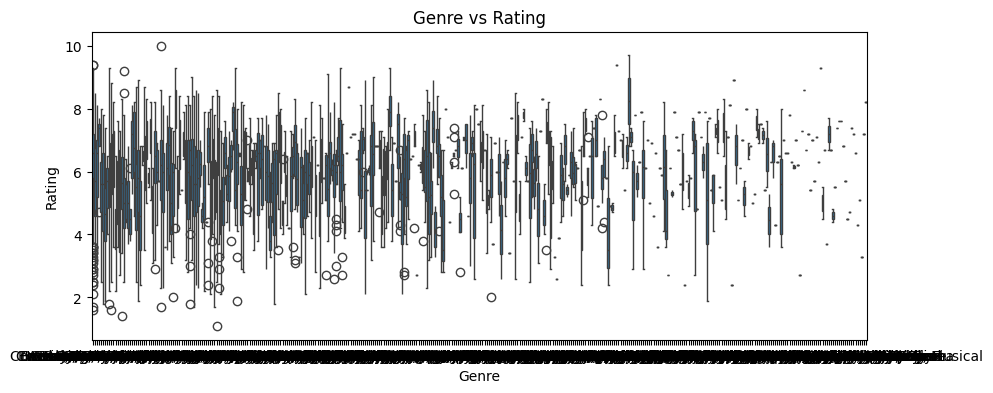

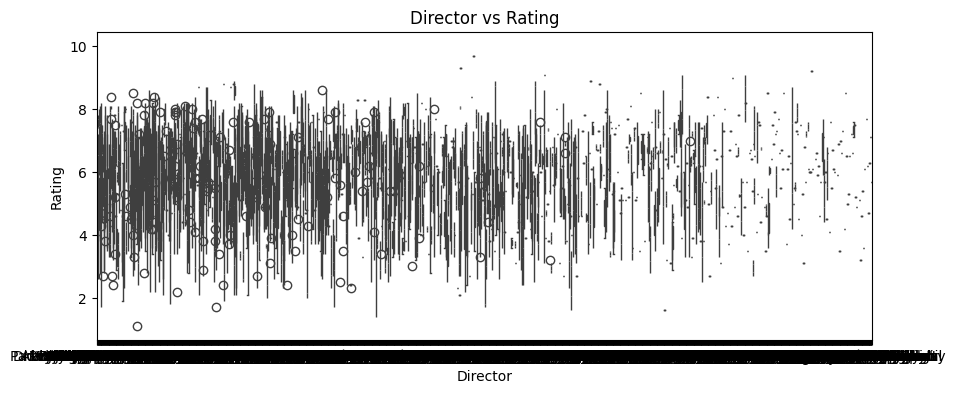

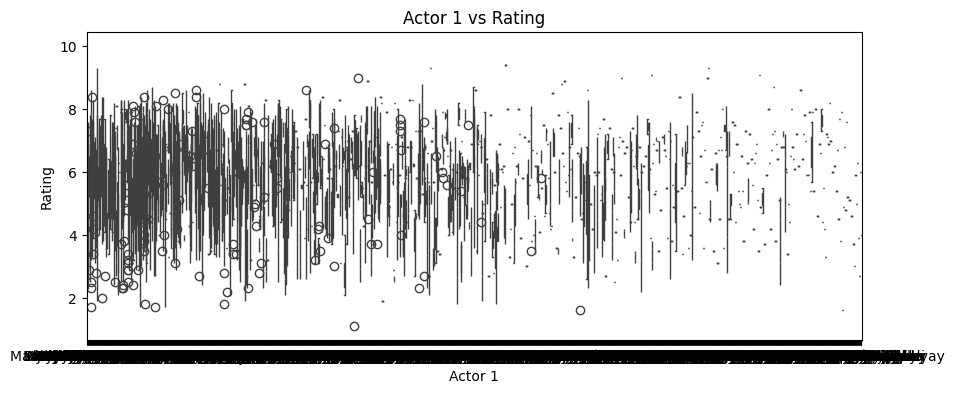

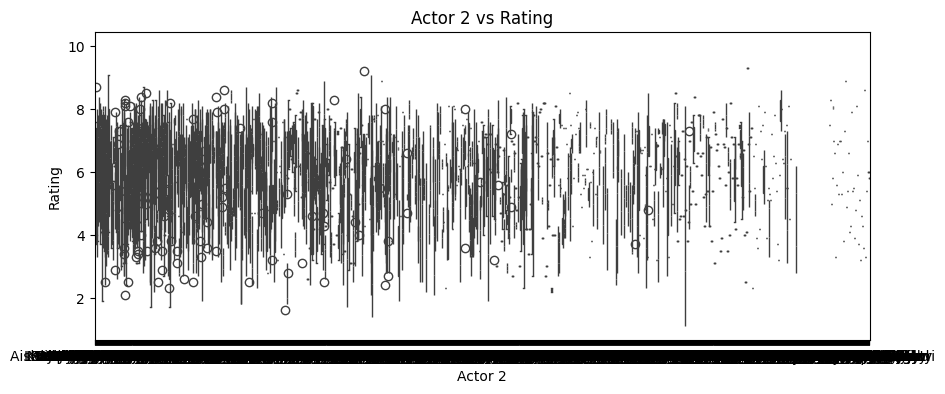

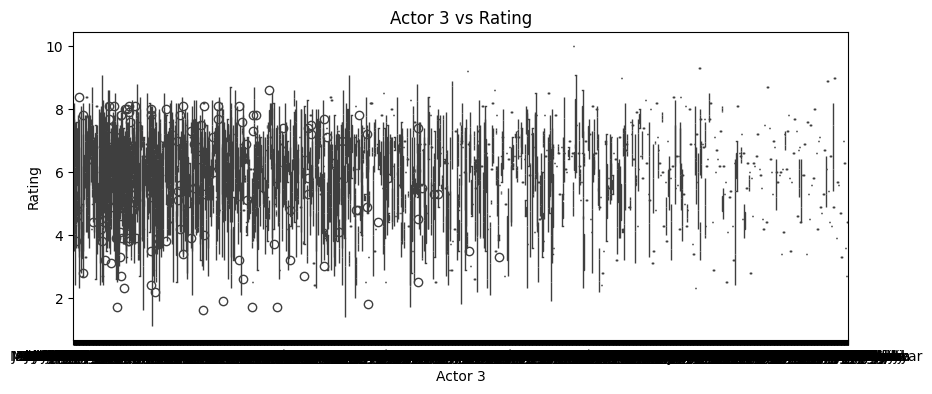

In [218]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], y=df['Rating'])
    plt.title(f'{col} vs Rating')
    plt.show()


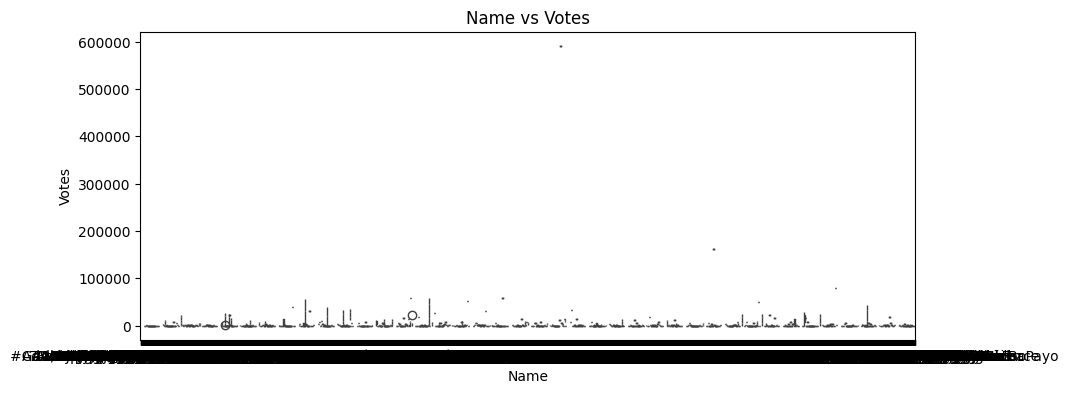

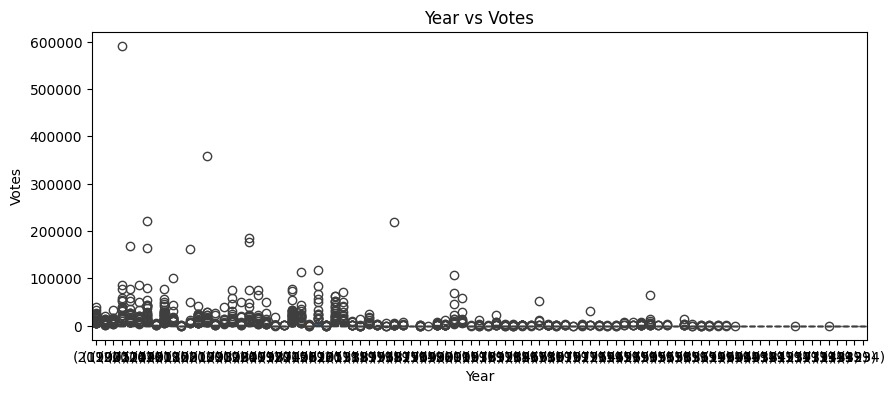

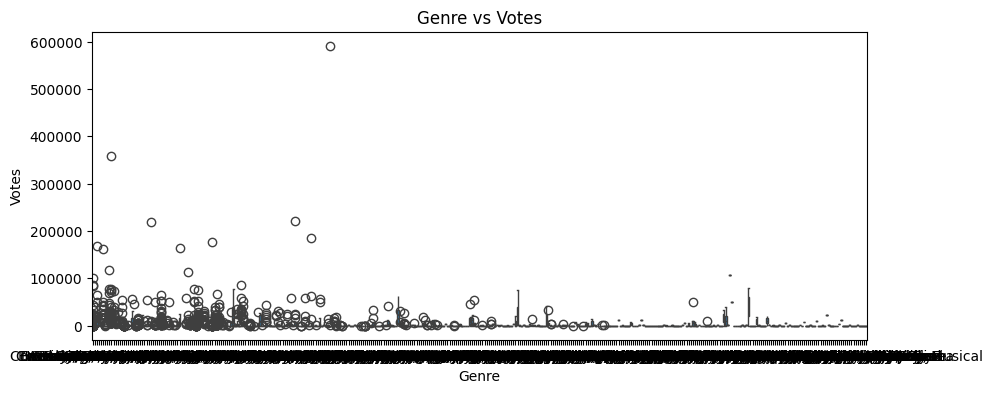

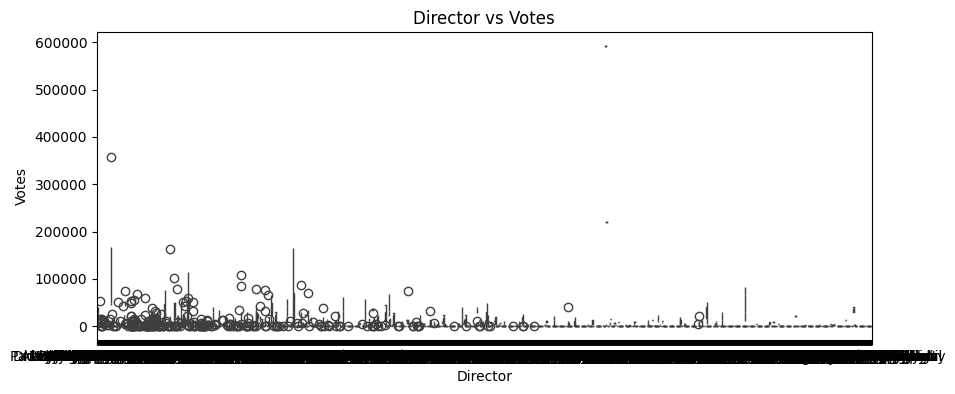

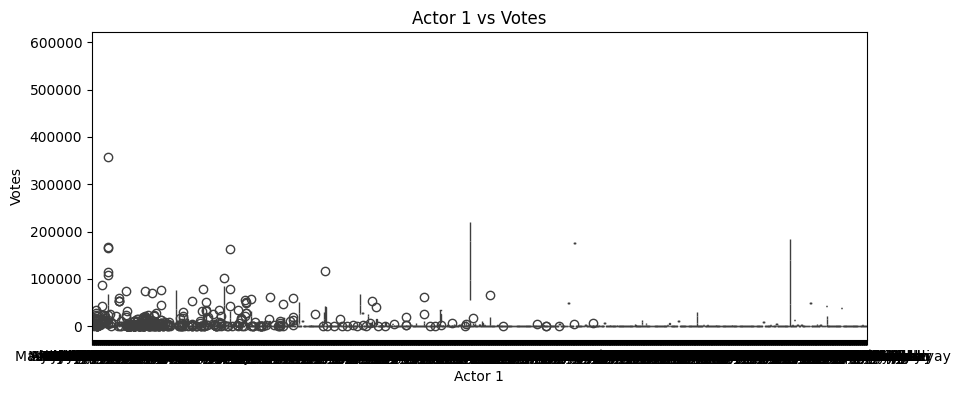

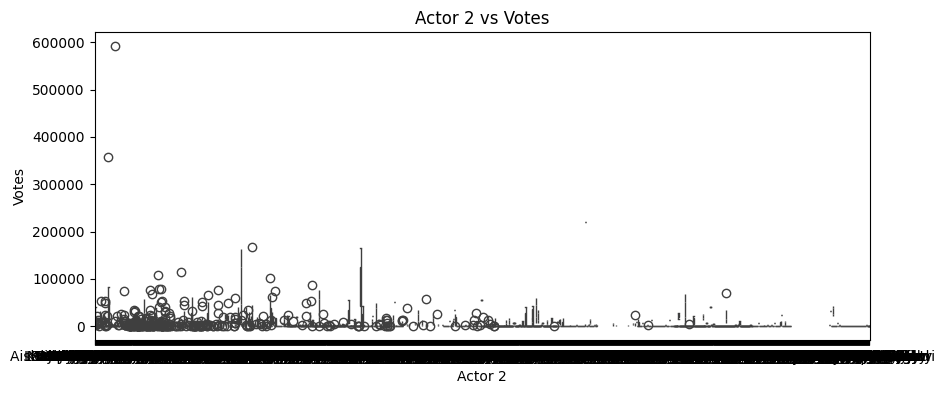

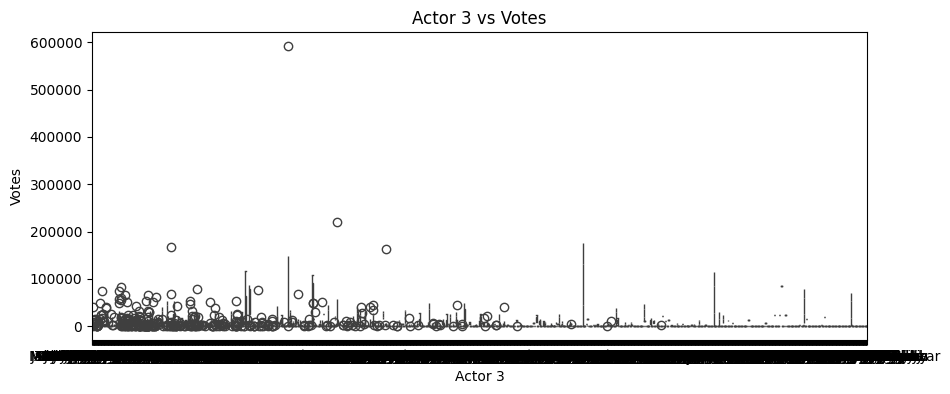

In [219]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], y=df['Votes'])
    plt.title(f'{col} vs Votes')
    plt.show()


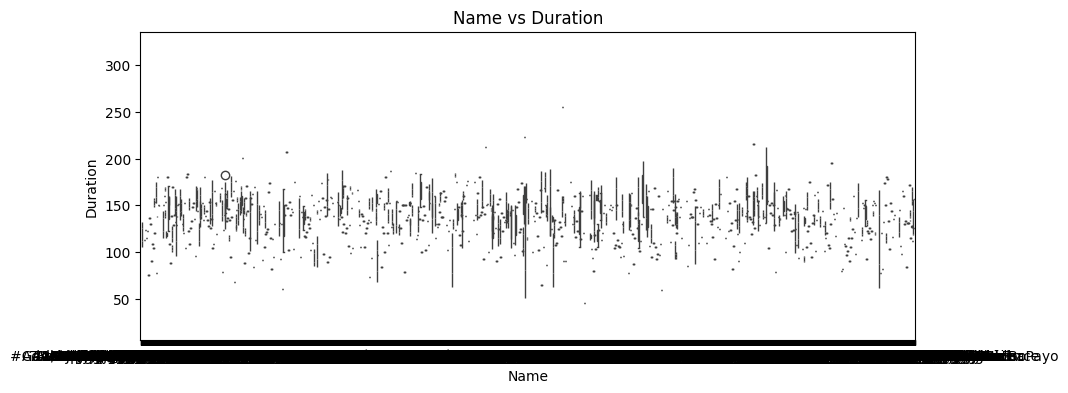

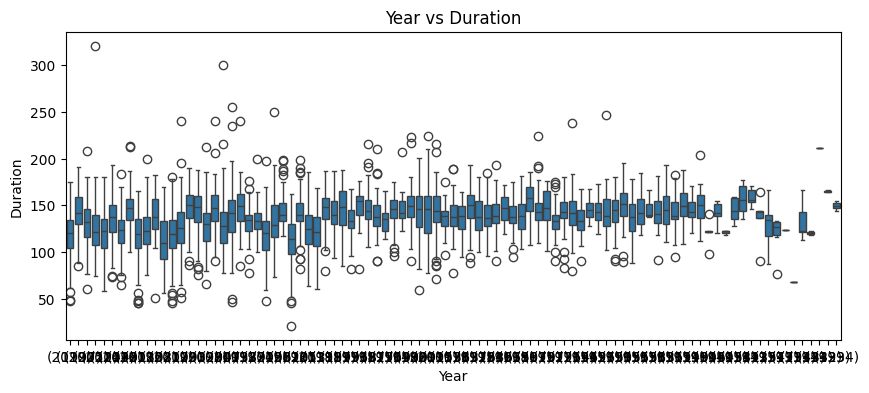

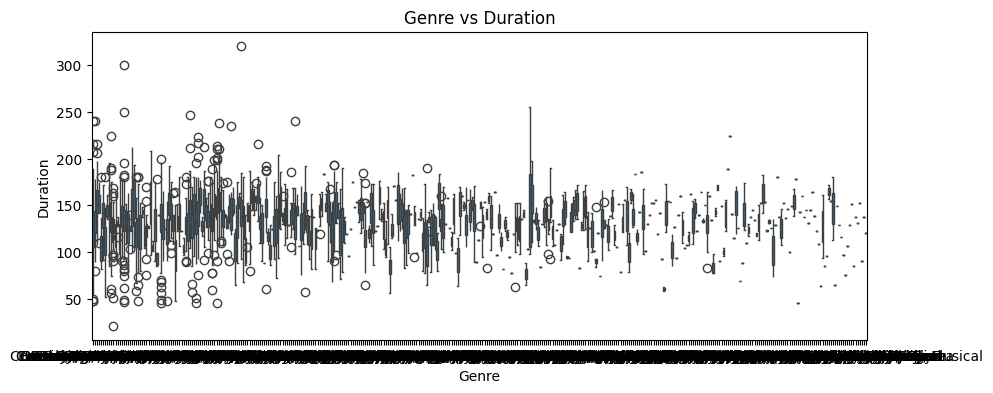

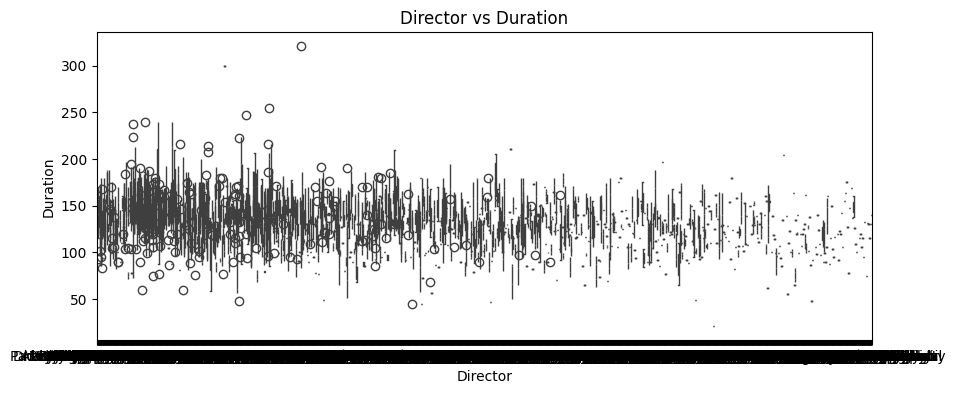

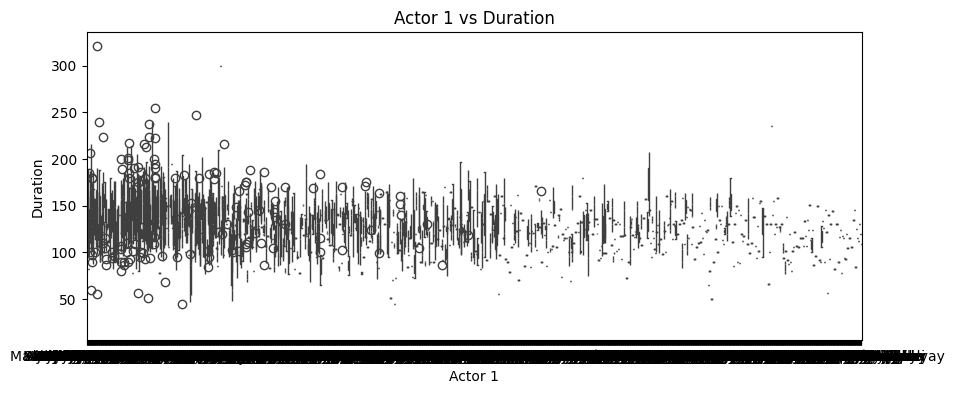

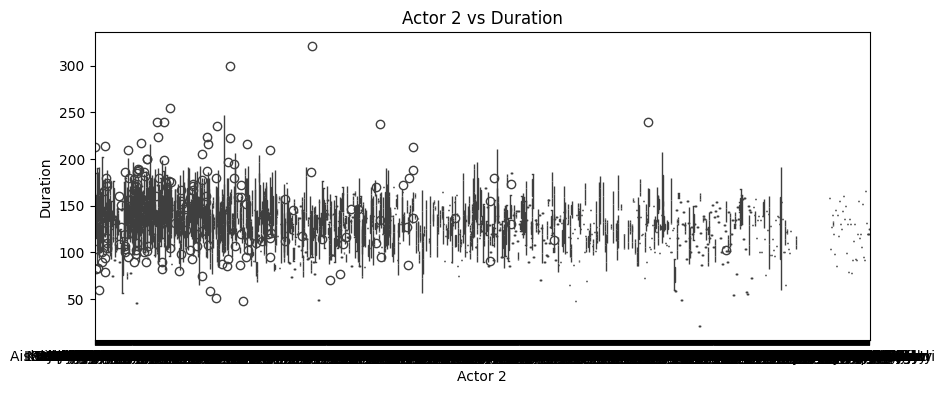

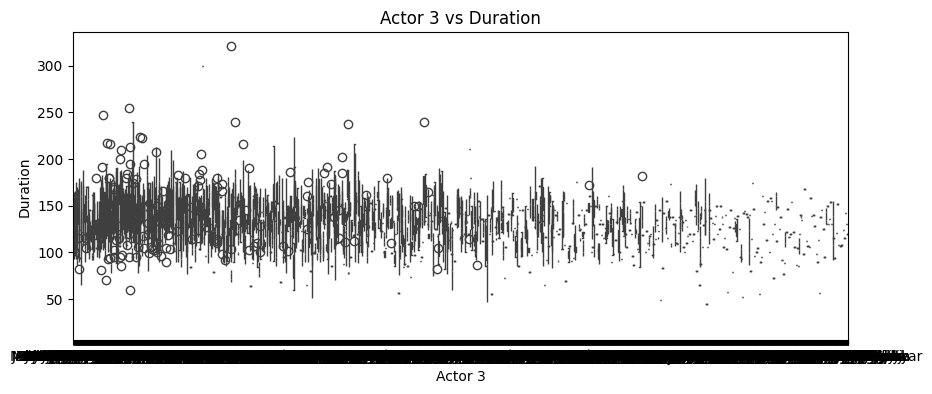

In [220]:
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], y=df['Duration'])
    plt.title(f'{col} vs Duration')
    plt.show()


## Data Preprocessing

In [221]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Count
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,3
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,3
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,3


In [222]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  li = list()
  for word in text:
    if word.isalnum():
      li.append(word)
  text = " ".join(li)
  return text

In [223]:
for col_name in list(df.select_dtypes(include=['object']).columns):
  if col_name != 'Genre':
    df[col_name] = df[col_name].apply(transform_text)


In [224]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Count
1,gadhvi he thought he was gandhi,2019,109,Drama,7.0,8,gaurav bakshi,rasika dugal,vivek ghamande,arvind jangid,1
3,yaaram,2019,110,"Comedy, Romance",4.4,35,ovais khan,prateik,ishita raj,siddhant kapoor,2
5,aur pyaar ho gaya,1997,147,"Comedy, Drama, Musical",4.7,827,rahul rawail,bobby deol,aishwarya rai bachchan,shammi kapoor,3
6,yahaan,2005,142,"Drama, Romance, War",7.4,1086,shoojit sircar,jimmy sheirgill,minissha lamba,yashpal sharma,3
8,a question mark,2012,82,"Horror, Mystery, Thriller",5.6,326,allyson patel,yash dave,muntazir ahmad,kiran bhatia,3


In [225]:
df['Genre'] = df['Genre'].str.split(',')

In [226]:
df['Genre'] = df['Genre'].apply(lambda x: x[0])

In [227]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Count
1,gadhvi he thought he was gandhi,2019,109,Drama,7.0,8,gaurav bakshi,rasika dugal,vivek ghamande,arvind jangid,1
3,yaaram,2019,110,Comedy,4.4,35,ovais khan,prateik,ishita raj,siddhant kapoor,2
5,aur pyaar ho gaya,1997,147,Comedy,4.7,827,rahul rawail,bobby deol,aishwarya rai bachchan,shammi kapoor,3
6,yahaan,2005,142,Drama,7.4,1086,shoojit sircar,jimmy sheirgill,minissha lamba,yashpal sharma,3
8,a question mark,2012,82,Horror,5.6,326,allyson patel,yash dave,muntazir ahmad,kiran bhatia,3


In [228]:
df1 = df.drop(['Name','Year'],axis=1)
for col in df1.select_dtypes(include=['object']).columns:
  df1[col] = df1.groupby(col)['Rating'].transform('mean')

In [229]:
df1.head()

,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Count
1,109,6.248697,7.0,8,7.000000,6.850000,7.000000,7.000000,1
3,110,5.838423,4.4,35,4.400000,5.420000,4.400000,4.450000,2
5,147,5.838423,4.7,827,5.313333,4.788889,5.786667,5.872727,3
6,142,6.248697,7.4,1086,7.383333,5.435000,6.933333,6.500000,3
8,82,4.687500,5.6,326,5.600000,5.600000,5.883333,5.600000,3


## Model Building

In [230]:
x = df1.drop('Rating',axis=1)
y = df1['Rating']

In [231]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [232]:
def adjusted_r2_score(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    return adj_r2

In [233]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

### Modelling With Linear Regression

In [234]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Model Evaluation

In [235]:
r2_score(y_test,y_pred)

0.7708391705235832

In [236]:
mean_absolute_error(y_test,y_pred)

0.4852435390961669

In [237]:
mean_squared_error(y_test,y_pred)

0.4185452699146277

In [238]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.6469507476729799

In [239]:
adjusted_r2_score(y_test,y_pred,len(y_test),df1.shape[0])

1.076332959453393

### Modelling With RandomForestRegressor

In [240]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### Model Evaluation

In [241]:
r2_score(y_test,y_pred)

0.8029248703612397

In [242]:
mean_absolute_error(y_test,y_pred)

0.41300706713780916

In [243]:
mean_squared_error(y_test,y_pred)

0.3599431173144876

In [244]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.5999525958894483

In [245]:
adjusted_r2_score(y_test,y_pred,len(y_test),df1.shape[0])

1.0656452846429227